Here are food reviews Amazon users left up to October 2012

The dataset consists of a single CSV file, Reviews.csv, and a corresponding SQLite table

* ID
* ProductId - unique identifer for the product
* UserId - unique ientifer for the user
* ProfileName
* HelpfulnessNumerator - number of users who found the review helpful
* HelpfulnessDenominator - number of user who indicated whether they found the review helpful
* Score - rating between 1 and 5
* Time - timestamp for the review
* Summary - brief summary of the review
* Text - text of the review

This notebook is largely following [ShivamBhandari](https://www.kaggle.com/iamshivam/d/snap/amazon-fine-food-reviews/amazon-fine-food-reviews)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(0)

df = pd.read_csv("Reviews.csv")
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [3]:
df.shape

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

Score = df['Score']
Score = Score.map(partition)

df['Review'] = df['Score'].map(partition)

print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


5    63.88
4    14.19
1     9.19
3     7.50
2     5.24
Name: Score, dtype: float64


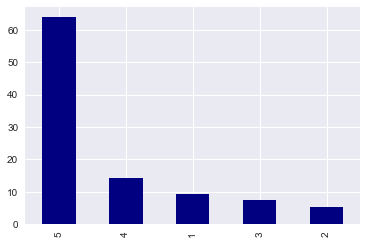

In [4]:
df_count_prcnt = df.Score.value_counts()

def compute_percentage(x):
    pct = float(x/df_count_prcnt.sum()) * 100
    return round(pct, 2)

df_count_prcnt = df_count_prcnt.apply(compute_percentage)

df_count_prcnt.plot(kind="bar", colormap='jet')

print(df_count_prcnt)

Looks like 5 star reviews constitute a large proportion of all reviews. The next is 4 star and then 1 star. In the middle ground, 2/3 stars is actually the least... Interesting.

In [5]:
# frequency count for users | product etc.

def top_n_counts (n, col, col_1):
    gb = df.groupby(col)[col_1].count()
    gb = gb.sort_values(ascending=False)
    return gb.head(n)

top_n_counts(15, ['ProductId', 'UserId'], 'ProductId')

ProductId   UserId        
B00008CQVA  A29JUMRL1US6YP    11
B000084EZ4  A29JUMRL1US6YP    11
B000WFORH0  A29JUMRL1US6YP    11
B000WFRQQ4  A29JUMRL1US6YP    11
B000WFKWDI  A29JUMRL1US6YP    11
B000WFEN74  A29JUMRL1US6YP    11
B000WFPJIG  A29JUMRL1US6YP    11
B000WFKI82  A29JUMRL1US6YP    11
B000WFU8O6  A29JUMRL1US6YP    11
B000WFN0VO  A29JUMRL1US6YP    11
B000WFUL3E  A29JUMRL1US6YP    11
B000084DWM  A3TVZM3ZIXG8YW    10
B003MWBFXY  A3TVZM3ZIXG8YW    10
B003MA8P02  A3TVZM3ZIXG8YW    10
B003WK0D8O  A3TVZM3ZIXG8YW    10
Name: ProductId, dtype: int64

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
A2SZLNSI5KOQJT    175
A29JUMRL1US6YP    172
AZV26LP92E6WU     167
AY1EF0GOH80EK     162
A31N6KB160O508    162
Name: UserId, dtype: int64


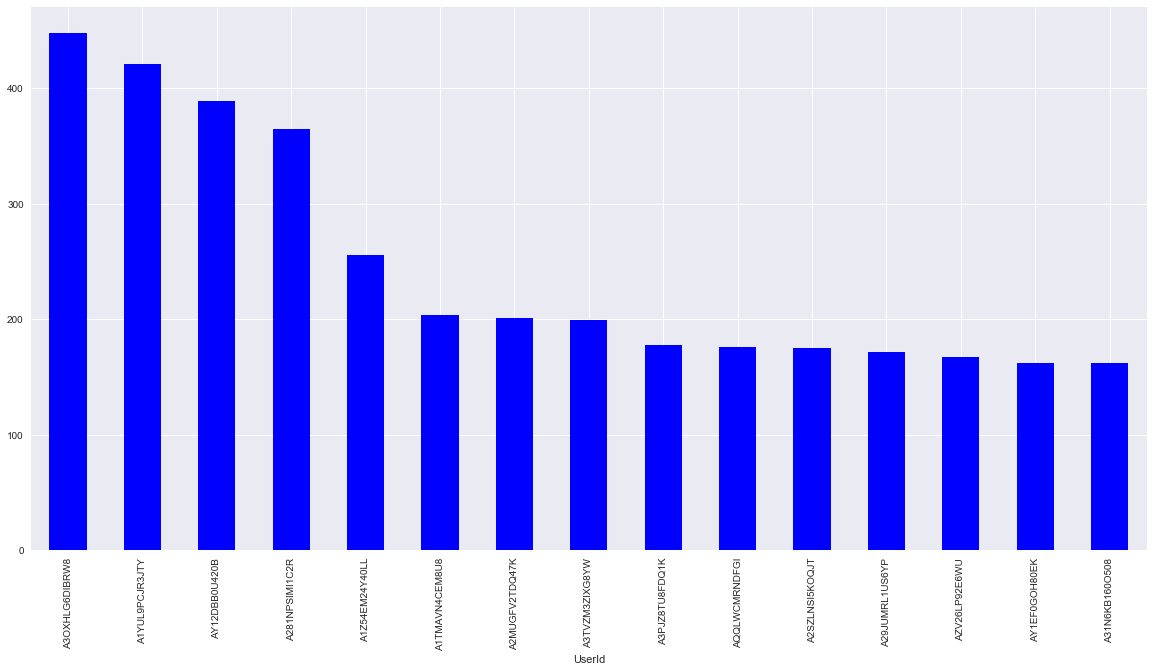

In [6]:
top_n_counts(15, ['UserId'], 'UserId').plot(kind='bar', figsize=(20,10), colormap='winter')

print (top_n_counts(15, ['UserId'], 'UserId'))

In [7]:
df[(df['ProductId'] == 'B000WFN0VO') & (df['UserId'] == 'A29JUMRL1US6YP')][['Text', 'Score']]

,Text,Score
191484,The pet food industry can be one of the most i...,5
191527,The pet food industry can be one of the most i...,5
191533,The pet food industry can be one of the most i...,5
191536,The pet food industry can be one of the most i...,5
191543,The pet food industry can be one of the most i...,5
191547,The pet food industry can be one of the most i...,5
191560,The pet food industry can be one of the most i...,5
191561,The pet food industry can be one of the most i...,5
191568,The pet food industry can be one of the most i...,5
191593,The pet food industry can be one of the most i...,5


this is odd...

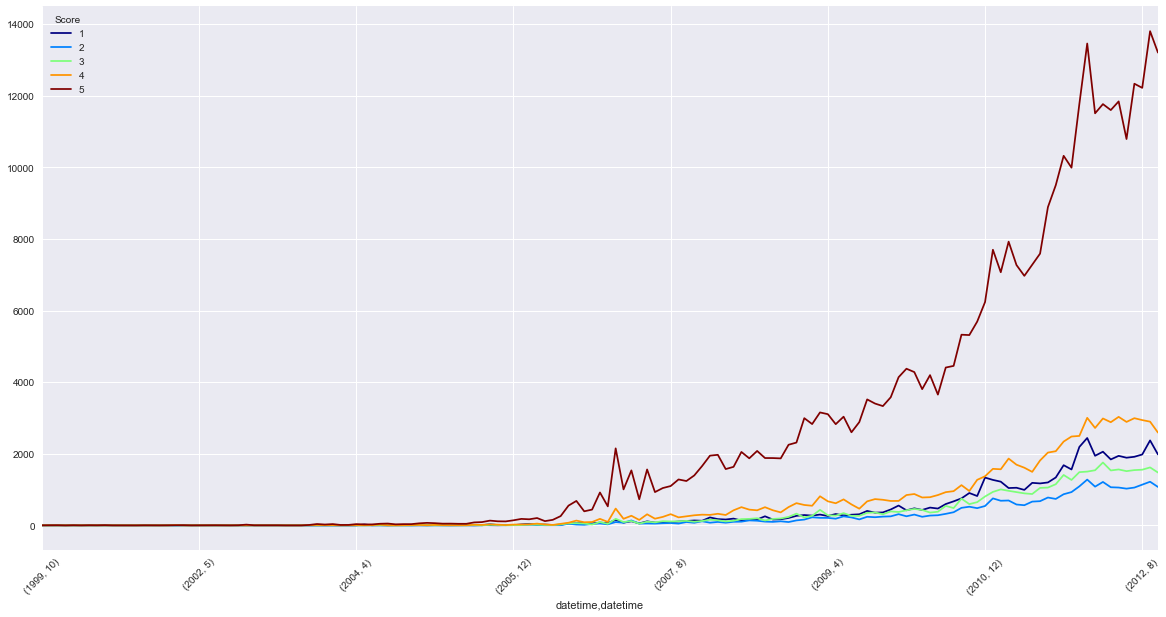

In [8]:
# Time series for monthly review counts
df['datetime'] = pd.to_datetime(df["Time"], unit='s')
df_grp = df.groupby([df.datetime.dt.year, df.datetime.dt.month, df.Score]).count()['ProductId'].unstack().fillna(0)

df_grp.plot(figsize=(20,10), rot=45, colormap='jet')

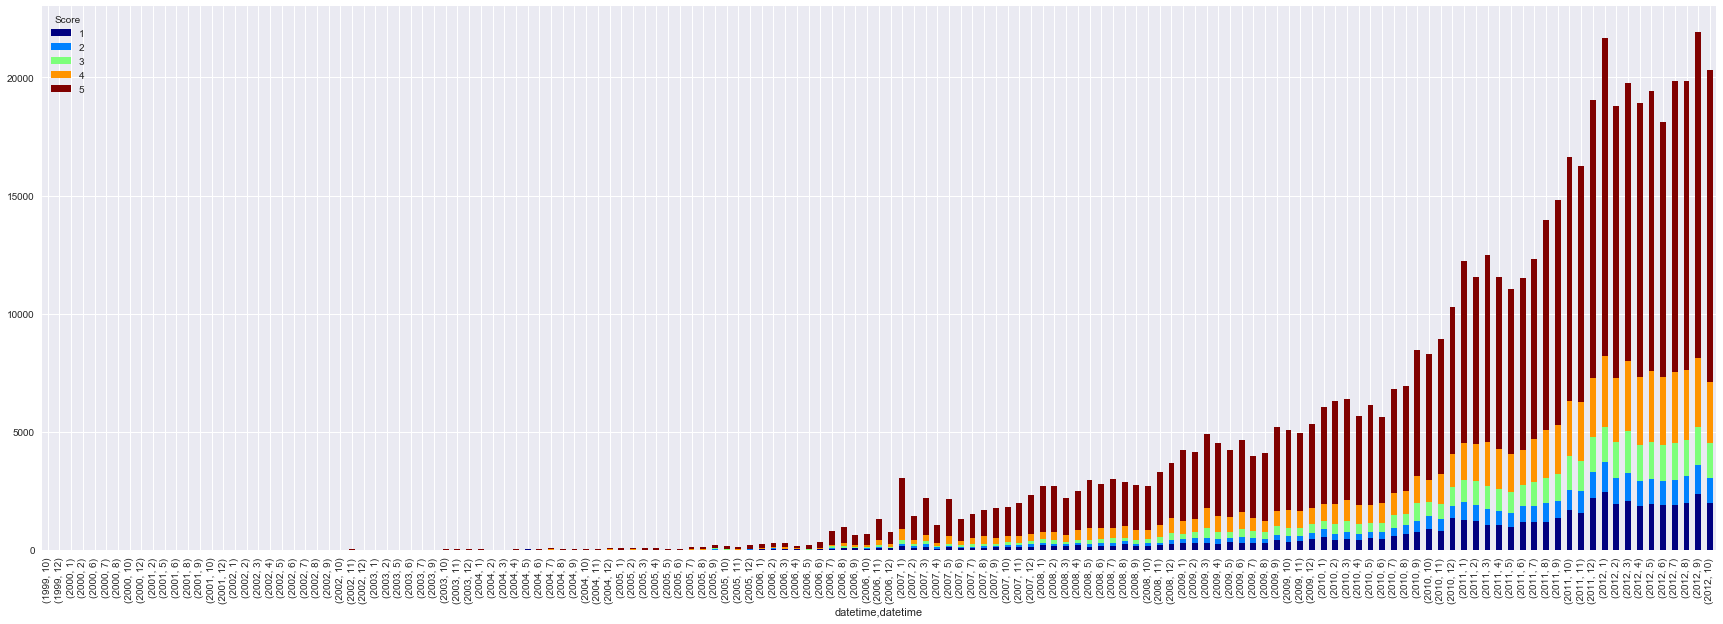

In [9]:
df['datetime'] = pd.to_datetime(df["Time"], unit='s')
df_grp = df.groupby([df.datetime.dt.year, df.datetime.dt.month, df.Score]).count()['ProductId'].unstack()

df_grp.plot(kind="bar", figsize=(30,10), stacked=True, colormap='jet')

In [26]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/char/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/char/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
pos = df.loc[df['Review'] == 'positive']
pos = pos[0:25000]

neg = df.loc[df['Review'] == 'negative']
neg = neg[0:25000]

def create_Word_Corpus(df):
    words_corpus = ''
    for val in df["Summary"]:
        try:            
            text = val.lower()
            #text = text.translate(trantab)
            tokens = nltk.word_tokenize(text)
            tokens = [word for word in tokens if word not in stopwords.words('english')]
            for words in tokens:
                words_corpus = words_corpus + words + ' '
        except:
            print(val)
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

nan
nan
nan
nan
nan
nan


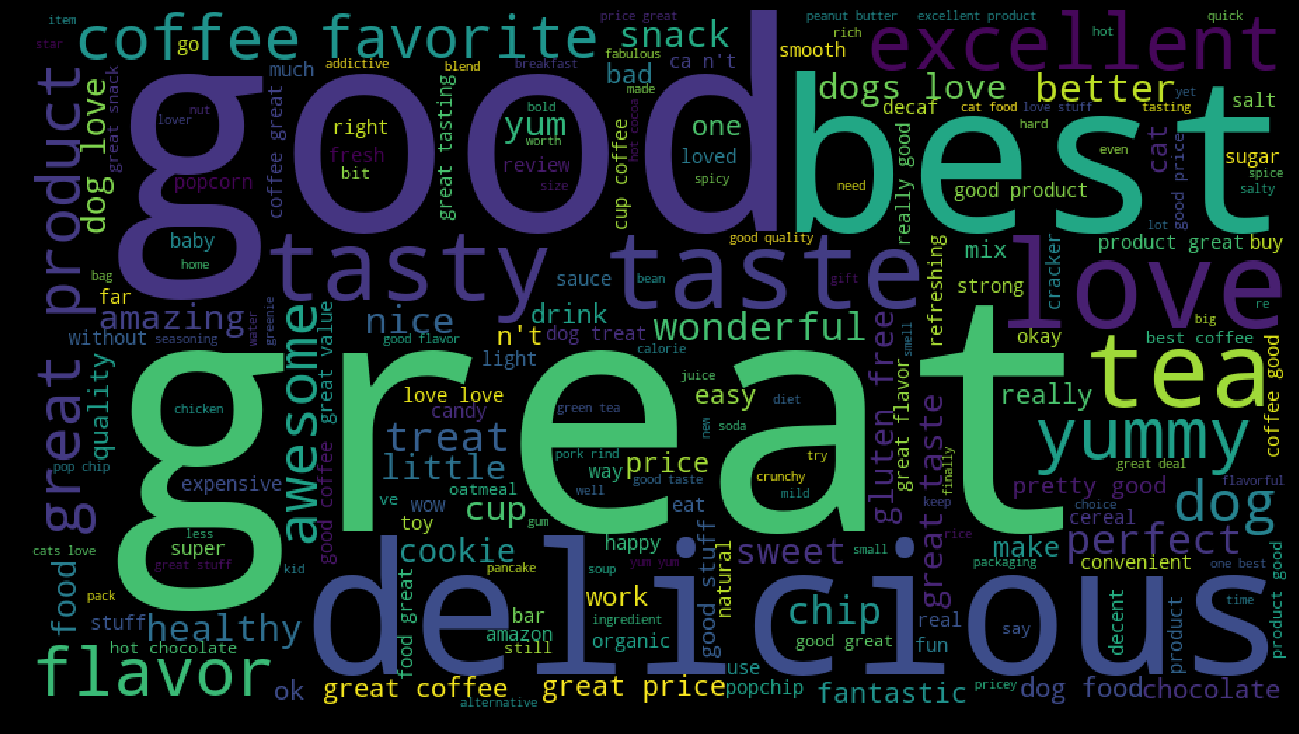

In [29]:
plot_Cloud(pos_wordcloud)

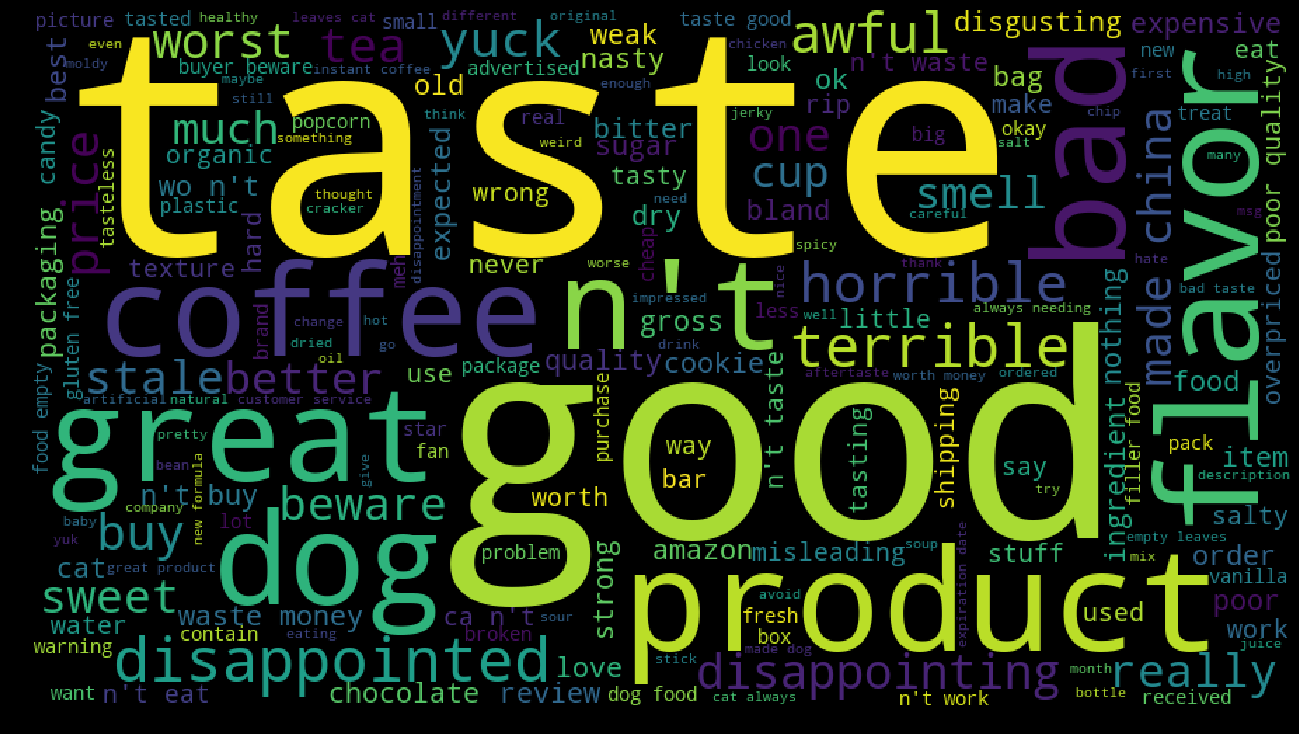

In [30]:
plot_Cloud(neg_wordcloud)

In [31]:
def sampling_dataset(df):
    count = 5000
    class_df_sampled = pd.DataFrame(columns = ["Score", "Text", "Review"])
    temp = []
    for c in df.Score.unique():
        class_indexes = df[df.Score == c].index
        random_indexes = np.random.choice(class_indexes, count, replace=False)
        temp.append(df.loc[random_indexes])
        
    for each_df in temp:
        class_df_sampled = pd.concat([class_df_sampled, each_df], axis=0)
    
    return class_df_sampled

df_Sample = sampling_dataset(df.loc[:, ["Score", "Text", "Review"]])
df_Sample.reset_index(drop=True, inplace=True)
print (df_Sample.head())
print (df_Sample.shape)

   Score                                               Text    Review
0    5.0  ...at least I hope it remains available. It is...  positive
1    5.0  My grandson is a beef jerky addict. We don't h...  positive
2    5.0  This coffee has a really great taste asnd if v...  positive
3    5.0  Healthy edibles are a great treat for our 5 ye...  positive
4    5.0  I have never been one to buy chicken in a can ...  positive
(25000, 3)
